In [127]:
import pandas as pd

 Make sure the Pandas library is installed and imported in the notebook

In [128]:
brand = pd.Series(['Infinity','Lexus','Ford'])
brand

0    Infinity
1       Lexus
2        Ford
dtype: object

In [44]:
color = pd.Series(['Black','White','Grey'])
color

0    Black
1    White
2     Grey
dtype: object

In [45]:
My_Cars = pd.DataFrame({'Cars':brand , "color":color })
My_Cars

,Cars,color
0,Infinity,Black
1,Lexus,White
2,Ford,Grey


<i>Now Import CSV and Try to Manipulate Data using Pandas</i>

In [129]:
Car_sales = pd.read_csv("./data/car-sales.csv")
Car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


![](./images/pandas-anatomy-of-a-dataframe.png)

![](./images/pandas-anatomy-of-a-dataframe.png{width=100px,height=50px})

In [47]:
My_Cars.to_html("Website.html",index=False)
#index set to fase so that it will not include index in CSV file
My_Cars.to_csv("Exported_CSV.csv",index=False)


In [48]:
view = pd.read_csv("Exported_CSV.csv")
view

,Cars,color
0,Infinity,Black
1,Lexus,White
2,Ford,Grey


# Describing The Data : -

In [130]:
Car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [50]:
Col = Car_sales.columns
print(Col) # returns a list of columns
print("************************************************")
index = Car_sales.index
print(index) #retuens  number of entries

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')
************************************************
RangeIndex(start=0, stop=10, step=1)


In [131]:
# Price = pd.to_numeric(Car_sales["Price"])
Car_sales["Price"] = Car_sales["Price"].str[:-2]
Car_sales["Price"]


0     $4,000.
1     $5,000.
2     $7,000.
3    $22,000.
4     $3,500.
5     $4,500.
6     $7,500.
7     $7,000.
8     $6,250.
9     $9,700.
Name: Price, dtype: object

In [132]:
Car_sales["Price"] = Car_sales["Price"].str.replace('[\$\,\.]', '' ).astype(int)


C:\Users\vedant\AppData\Local\Temp\ipykernel_18884\3094572574.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Car_sales["Price"] = Car_sales["Price"].str.replace('[\$\,\.]', '' ).astype(int)


In [113]:
Car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 492.0+ bytes


# Statistical analysis : 

In [133]:
Car_sales.describe() # all numeric values addressed only 

,Odometer (KM),Doors,Price
count,10.000000,10.000000,10.000000
mean,78601.400000,4.000000,7645.000000
std,61983.471735,0.471405,5379.407753
min,11179.000000,3.000000,3500.000000
25%,35836.250000,4.000000,4625.000000
50%,57369.000000,4.000000,6625.000000
75%,96384.500000,4.000000,7375.000000
max,213095.000000,5.000000,22000.000000


In [60]:
print("Mean distance Covered")
print(Car_sales["Odometer (KM)"].mean())
print("Median of number of doors")
print(Car_sales["Doors"].median())
print(Car_sales["Odometer (KM)"].quantile())

Mean distance Covered
78601.4
Median of number of doors
4.0
57369.0


In [70]:
print("Total distance covered by each car")
Total = Car_sales["Odometer (KM)"].sum()
Total

Total distance covered by each car


786014

In [115]:
n = len(Car_sales)

In [72]:
avg = Total/n
avg

78601.4

In [75]:
if(avg==Car_sales["Odometer (KM)"].mean()):
    print("Verified mean method")
else:
    print("OOPS !!! there may be missing value")

Verified mean method


# Viewing and Slecting :

In [134]:
print(Car_sales.head(4)) #default () = 5 items useful for viewing large dataset
print("................................................")
print(Car_sales.tail(2))

     Make Colour  Odometer (KM)  Doors  Price
0  Toyota  White         150043      4   4000
1   Honda    Red          87899      4   5000
2  Toyota   Blue          32549      3   7000
3     BMW  Black          11179      5  22000
................................................
     Make Colour  Odometer (KM)  Doors  Price
8  Toyota  White          60000      4   6250
9  Nissan  White          31600      4   9700


In [117]:
city = pd.Series(["mumabai","dubai","Thane","Airoli"],index=[4,7,2,2]) # index should be seprately assigne to each 
city

4    mumabai
7      dubai
2      Thane
2     Airoli
dtype: object

In [82]:
#.loc
city.loc[2] #all items of index 2

2     Thane
2    Airoli
dtype: object

In [83]:
Car_sales.loc[5]

Make               Toyota
Colour              Green
Odometer (KM)       99213
Doors                   4
Price            4,500.00
Name: 5, dtype: object

In [84]:
#.iloc
city.iloc[2] #position 2 ie (0,1,2,3) in this case

'Thane'

In [85]:
Car_sales.iloc[5] #same as index and position are defualt

Make               Toyota
Colour              Green
Odometer (KM)       99213
Doors                   4
Price            4,500.00
Name: 5, dtype: object

In [88]:
Car_sales.Make # same as Car_sales['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [135]:
Car_sales[Car_sales["Odometer (KM)"]>100000] #selecting data based on filters

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
4,Nissan,White,213095,4,3500


In [136]:
Car_sales[Car_sales["Colour"]=='White']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
4,Nissan,White,213095,4,3500
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [137]:
Car_sales #selecting does not change original data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


<i>Cross tab is used for comparitive view </i>

In [99]:
B = pd.crosstab(Car_sales['Make'] != "Toyota",Car_sales['Doors'] != 5)

In [100]:
B

Doors,False,True
Make,,
False,0,4
True,1,5


In [101]:
A = pd.crosstab(Car_sales['Make'],Car_sales['Doors'])
A

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [107]:
C = Car_sales.groupby(["Make"]).mean()

C:\Users\vedant\AppData\Local\Temp\ipykernel_18884\2792556650.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  C = Car_sales.groupby(["Make"]).mean()


In [108]:
C

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

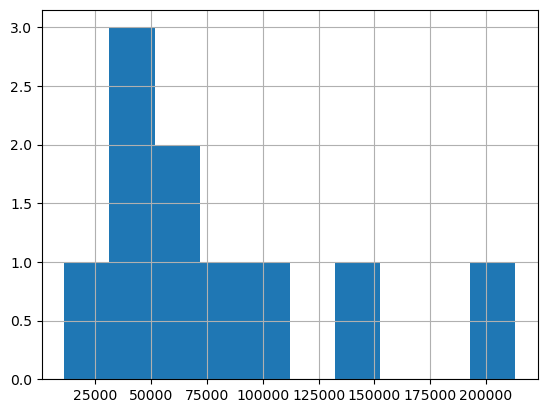

In [122]:
Car_sales["Odometer (KM)"].hist()

<Axes: >

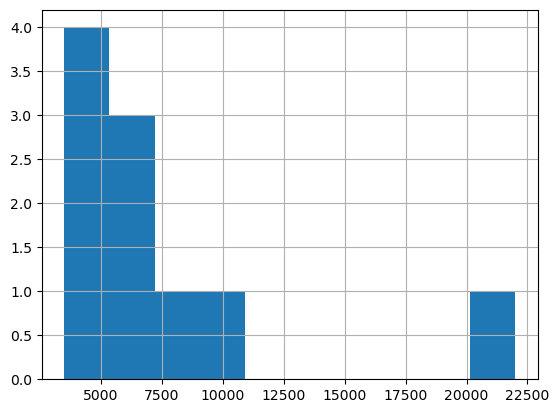

In [138]:
Car_sales['Price'].hist()

<Axes: >

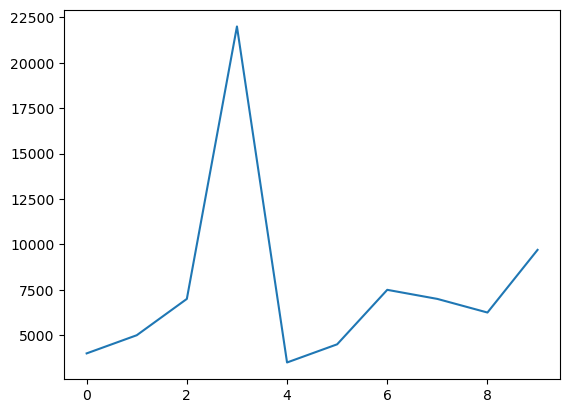

In [139]:
Car_sales["Price"].plot()